# Exploratory Data Analysis (EDA) - Diabetes Prediction Dataset

Notebook ini untuk memahami karakteristik dataset Pima Indians Diabetes sebelum membangun model machine learning.

## Goals:
1. Memahami distribusi setiap feature
2. Identifikasi missing values dan outliers
3. Analisis korelasi antar features
4. Menentukan preprocessing strategy yang optimal

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Dataset

In [29]:
# Load dataset
df = pd.read_csv('../data/diabetes.csv')

# Tampilkan informasi dasar
print(f"📊 Shape dataset: {df.shape}")
print(f"\n📋 Jumlah baris: {df.shape[0]}")
print(f"📋 Jumlah kolom: {df.shape[1]}")

# Tampilkan 5 baris pertama
print("\n🔍 5 baris pertama:")
df.head()

📊 Shape dataset: (768, 9)

📋 Jumlah baris: 768
📋 Jumlah kolom: 9

🔍 5 baris pertama:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# Informasi kolom dan tipe data
print("📝 Informasi Dataset:")
df.info()

print("\n" + "="*70)
print("🔍 INTERPRETASI: Informasi Dataset")
print("="*70)
print("\n✅ Kualitas Data:")
print("   • Semua kolom memiliki 768 non-null values - TIDAK ADA missing values")
print("   • Memory usage hanya 54.1 KB - dataset ringan dan efficient")
print("   • Tipe data konsisten: 7 integer, 2 float")
print("\n📊 Struktur Data:")
print("   • 8 Features independen (Pregnancies s/d Age)")
print("   • 1 Target dependen (Outcome: 0 atau 1)")
print("   • Semua features numerik - tidak perlu encoding untuk kategorikal")
print("\n⚠️ Catatan Penting:")
print("   • Meskipun tidak ada NaN, analisis selanjutnya akan menunjukkan")
print("     banyak nilai 0 yang tidak valid secara medis")
print("   • Ini adalah contoh 'missing values tersembunyi' yang perlu di-handle")
print("="*70)

📝 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

🔍 INTERPRETASI: Informasi Dataset

✅ Kualitas Data:
   • Semua kolom memiliki 768 non-null values - TIDAK ADA missing values
   • Memory usage hanya 54.1 KB - dataset ringan dan efficient
   • Tipe data konsisten: 7 in

## 2. Statistik Deskriptif

In [31]:
# Statistik deskriptif
print("📊 Statistik Deskriptif:")
df.describe()

print("\n" + "="*70)
print("🔍 INTERPRETASI: Statistik Deskriptif")
print("="*70)

print("\n1️⃣  PREGNANCIES (Jumlah Kehamilan):")
print("   • Mean: 3.8, Median: 3.0 → Distribusi mendekati normal")
print("   • Range: 0-17 → Ada wanita dengan 17 kehamilan!")
print("   • Max jauh dari mean → Potential outlier tapi masih masuk akal")

print("\n2️⃣  GLUCOSE (Gula Darah):")
print("   • Mean: 120.9 mg/dL (Normal: 70-100 mg/dL)")
print("   • Median: 117 mg/dL → Close to mean")
print("   ⚠️ MIN: 0 → TIDAK MUNGKIN secara medis!")
print("   • Max: 199 mg/dL → Pre-diabetic range")

print("\n3️⃣  BLOOD PRESSURE (Tekanan Darah):")
print("   • Mean: 69.1 mmHg (Normal: 60-80 mmHg)")
print("   • Range: 0-122 mmHg")
print("   ⚠️ MIN: 0 → TIDAK MUNGKIN secara medis!")

print("\n4️⃣  SKIN THICKNESS (Ketebalan Kulit):")
print("   • Mean: 20.5 mm, Median: 23 mm")
print("   ⚠️ MIN: 0 dan 25%: 0 → 25% data bernilai 0!")
print("   • Max: 99 mm → Ada extreme outliers")

print("\n5️⃣  INSULIN:")
print("   • Mean: 79.8 mu U/ml, Median: 30.5")
print("   ⚠️ MIN & 25%: 0 → 50% data bernilai 0!")
print("   • Max: 846 mu U/ml → SANGAT TINGGI (potential outlier)")
print("   • Std: 115.2 > Mean → Highly skewed distribution")

print("\n6️⃣  BMI (Body Mass Index):")
print("   • Mean: 32.0 (Overweight category: 25-29.9)")
print("   • Median: 32.0 → Symmetric distribution")
print("   ⚠️ MIN: 0 → TIDAK MUNGKIN (orang hidup pasti punya BMI)")
print("   • Max: 67.1 → Extreme obesity")

print("\n7️⃣  DIABETES PEDIGREE FUNCTION:")
print("   • Mean: 0.472, Median: 0.373")
print("   • Skewed right (mean > median)")
print("   • Range: 0.078-2.42 → Genetic risk varies widely")

print("\n8️⃣  AGE (Usia):")
print("   • Mean: 33.2 tahun, Median: 29 tahun")
print("   • Range: 21-81 tahun")
print("   • Skewed right → More younger samples")

print("\n9️⃣  OUTCOME (Target):")
print("   • Mean: 0.349 → 34.9% samples have diabetes")
print("   • Confirms class imbalance (65.1% vs 34.9%)")

print("\n" + "="*70)
print("💡 KEY INSIGHTS:")
print("="*70)
print("   • Banyak nilai 0 yang tidak valid secara medis")
print("   • Distribusi tidak normal untuk beberapa features")
print("   • Outliers存在 terutama di Insulin dan SkinThickness")
print("   • Perlu scaling karena range sangat bervariasi")
print("="*70)

📊 Statistik Deskriptif:

🔍 INTERPRETASI: Statistik Deskriptif

1️⃣  PREGNANCIES (Jumlah Kehamilan):
   • Mean: 3.8, Median: 3.0 → Distribusi mendekati normal
   • Range: 0-17 → Ada wanita dengan 17 kehamilan!
   • Max jauh dari mean → Potential outlier tapi masih masuk akal

2️⃣  GLUCOSE (Gula Darah):
   • Mean: 120.9 mg/dL (Normal: 70-100 mg/dL)
   • Median: 117 mg/dL → Close to mean
   ⚠️ MIN: 0 → TIDAK MUNGKIN secara medis!
   • Max: 199 mg/dL → Pre-diabetic range

3️⃣  BLOOD PRESSURE (Tekanan Darah):
   • Mean: 69.1 mmHg (Normal: 60-80 mmHg)
   • Range: 0-122 mmHg
   ⚠️ MIN: 0 → TIDAK MUNGKIN secara medis!

4️⃣  SKIN THICKNESS (Ketebalan Kulit):
   • Mean: 20.5 mm, Median: 23 mm
   ⚠️ MIN: 0 dan 25%: 0 → 25% data bernilai 0!
   • Max: 99 mm → Ada extreme outliers

5️⃣  INSULIN:
   • Mean: 79.8 mu U/ml, Median: 30.5
   ⚠️ MIN & 25%: 0 → 50% data bernilai 0!
   • Max: 846 mu U/ml → SANGAT TINGGI (potential outlier)
   • Std: 115.2 > Mean → Highly skewed distribution

6️⃣  BMI (Body M

In [32]:
# Cek missing values secara eksplisit
print("❓ Missing Values (NaN):")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ Tidak ada missing values (NaN) secara eksplisit")
else:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")

❓ Missing Values (NaN):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

✅ Tidak ada missing values (NaN) secara eksplisit


## 3. Analisis Nilai Nol (Zeros) yang Tidak Valid

Secara medis, beberapa kolom tidak boleh memiliki nilai 0. Nilai 0 ini kemungkinan merepresentasikan missing values.

In [33]:
# Kolom yang secara medis tidak boleh bernilai 0
medical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("⚠️ Analisis Nilai Nol di Kolom Medis:\n")
print("=" * 60)

zero_counts = {}
for col in medical_cols:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    zero_counts[col] = zero_count
    
    print(f"{col}:")
    print(f"  - Jumlah nilai 0: {zero_count} dari {len(df)} samples")
    print(f"  - Persentase: {zero_percentage:.2f}%")
    print()

print("=" * 60)
print(f"\n🔍 Total problematic zeros: {sum(zero_counts.values())}")

print("\n" + "="*70)
print("🔍 INTERPRETASI: Analisis Nilai Nol")
print("="*70)

print("\n❌ MASALAH:")
print("   • 652 nilai 0 yang TIDAK VALID secara medis")
print("   • Ini adalah missing values yang 'disembunyikan' sebagai 0")
print("   • Tidak mungkin orang hidup memiliki:")
print("     - Glucose = 0 (akan koma/ meninggal)")
print("     - BloodPressure = 0 (tidak ada denyut jantung)")
print("     - BMI = 0 (tidak ada massa tubuh)")

print("\n📊 SEVERITY ANALYSIS:")
print("   🔴 CRITICAL (Harus di-handle):")
print("      • Insulin: 374 zeros (48.7%) - HAMPIR SETENGAH DATA!")
print("      • SkinThickness: 227 zeros (29.6%) - Hampir 30%")
print("   🟡 MODERATE:")
print("      • BloodPressure: 35 zeros (4.6%)")
print("   🟢 LOW:")
print("      • BMI: 11 zeros (1.4%)")
print("      • Glucose: 5 zeros (0.7%)")

print("\n💡 KENAPA NILAI 0 INI?")
print("   • Measurement error - alat tidak bisa membaca")
print("   • Data entry error - tidak diisi, default ke 0")
print("   • Missing data yang dikodekan sebagai 0")
print("   • Bukan nilai asli pasien")

print("\n✅ SOLUSI YANG AKAN DITERAPKAN:")
print("   1. Buat Custom Transformer:")
print("      • Deteksi nilai 0 di medical columns")
print("      • Convert 0 → NaN (missing value)")
print("   2. Imputation:")
print("      • Gunakan MEDIAN (bukan mean)")
print("      • Median lebih robust terhadap outliers")
print("      • Median tidak terpengaruh distribusi skewed")
print("   3. JANGAN hapus rows:")
print("      • Akan kehilangan terlalu banyak data")
print("      • 48.7% Insulin zeros = 374 rows hilang")

print("\n⚠️ PREGNANCIES = 0?")
print("   • Pregnancies dengan 0 adalah VALID")
print("   • Artinya: belum pernah hamil")
print("   • JANGAN convert 0 di Pregnancies")

print("\n📈 IMPACT KE MODEL:")
print("   • Tanpa handling: Model akan BELAJAR POLA SALAH")
print("   • Dengan handling: Model bisa belajar pattern yang benar")
print("   • Contoh: Glucose=0 akan dianggap 'sangat sehat'")
print("     padahal itu missing data!")

print("="*70)

⚠️ Analisis Nilai Nol di Kolom Medis:

Glucose:
  - Jumlah nilai 0: 5 dari 768 samples
  - Persentase: 0.65%

BloodPressure:
  - Jumlah nilai 0: 35 dari 768 samples
  - Persentase: 4.56%

SkinThickness:
  - Jumlah nilai 0: 227 dari 768 samples
  - Persentase: 29.56%

Insulin:
  - Jumlah nilai 0: 374 dari 768 samples
  - Persentase: 48.70%

BMI:
  - Jumlah nilai 0: 11 dari 768 samples
  - Persentase: 1.43%


🔍 Total problematic zeros: 652

🔍 INTERPRETASI: Analisis Nilai Nol

❌ MASALAH:
   • 652 nilai 0 yang TIDAK VALID secara medis
   • Ini adalah missing values yang 'disembunyikan' sebagai 0
   • Tidak mungkin orang hidup memiliki:
     - Glucose = 0 (akan koma/ meninggal)
     - BloodPressure = 0 (tidak ada denyut jantung)
     - BMI = 0 (tidak ada massa tubuh)

📊 SEVERITY ANALYSIS:
   🔴 CRITICAL (Harus di-handle):
      • Insulin: 374 zeros (48.7%) - HAMPIR SETENGAH DATA!
      • SkinThickness: 227 zeros (29.6%) - Hampir 30%
   🟡 MODERATE:
      • BloodPressure: 35 zeros (4.6%)
   🟢 

## 4. Distribusi Target (Outcome)

In [34]:
# Distribusi kelas target
outcome_counts = df['Outcome'].value_counts()
outcome_percentages = df['Outcome'].value_counts(normalize=True) * 100

print("📈 Distribusi Target (Outcome):\n")
print("=" * 40)
for outcome in [0, 1]:
    label = "No Diabetes" if outcome == 0 else "Diabetes"
    count = outcome_counts[outcome]
    percentage = outcome_percentages[outcome]
    print(f"{label} ({outcome}): {count} samples ({percentage:.2f}%)")

print("=" * 40)
print(f"\n⚠️ Class Imbalance Ratio: {outcome_counts[0] / outcome_counts[1]:.2f}:1")
print("   (Rekomendasi: Pertimbangkan class weights atau SMOTE)")

print("\n" + "="*70)
print("🔍 INTERPRETASI: Distribusi Target")
print("="*70)

print("\n📊 RASIO KELAS:")
print(f"   • No Diabetes : Diabetes = {outcome_counts[0]}:{outcome_counts[1]}")
print(f"   • Ratio : {outcome_counts[0] / outcome_counts[1]:.2f}:1")
print("   • Untuk setiap 2 pasien non-diabetes, ada 1 pasien diabetes")

print("\n⚠️ APA ITU CLASS IMBALANCE?")
print("   • Ketidakseimbangan jumlah samples antar kelas")
print("   • Di sini: 65.1% vs 34.9%")
print("   • Tidak SEVERE (biasanya > 90:10 baru severe)")
print("   • Tapi tetap perlu dihandling")

print("\n❌ DAMPAK CLASS IMBALANCE KE MODEL:")
print("   1. Bias ke kelas mayoritas (No Diabetes):")
print("      • Model cenderung memprediksi 'No Diabetes'")
print("      • Karena itu cara termudah untuk tingkatkan accuracy")
print("   2. Misleading Accuracy:")
print("      • Jika model selalu prediksi 'No Diabetes'")
print("      • Accuracy = 65.1% (tapi modelnya USELESS!)")
print("      • Tidak pernah bisa mendeteksi diabetes")
print("   3. Poor Recall untuk kelas minoritas:")
print("      • Banyak missed diabetes cases")
print("      • Ini BERBAHAYA untuk medical diagnosis!")

print("\n✅ STRATEGI HANDLING:")
print("   1. CLASS WEIGHTS:")
print("      • Beri bobot lebih tinggi ke kelas Diabetes (1)")
print("      • class_weight='balanced' di scikit-learn")
print("      • Model akan 'lebih peduli' ke kelas minoritas")
print("   2. METRIC PRIORITY:")
print("      • Jangan fokus ke Accuracy!")
print("      • Fokus ke RECALL (minimize false negatives)")
print("      • Monitor F1-Score (balance precision & recall)")
print("   3. RESAMPLING (opsional):")
print("      • SMOTE: Synthetic Minority Oversampling")
print("      • Buat samples sintetis untuk kelas Diabetes")
print("      • Atau undersampling kelas No Diabetes")

print("\n🏥 CONTEXT MEDIS:")
print("   • False Negative = Mengatakan sehat, padahal diabetes")
print("   • False Positive = Mengatakan diabetes, padahal sehat")
print("   • Dalam medicine: False Negative LEBIH BAHAYA!")
print("   • Kenapa? Pasien tidak dapat treatment, kondisi memburuk")
print("   • Makanya RECALL lebih penting dari PRECISION")

print("\n📈 TARGET METRICS:")
print("   • Recall > 70% (minimal)")
print("   • F1-Score > 0.65")
print("   • Accuracy sekadar bonus")

print("="*70)

📈 Distribusi Target (Outcome):

No Diabetes (0): 500 samples (65.10%)
Diabetes (1): 268 samples (34.90%)

⚠️ Class Imbalance Ratio: 1.87:1
   (Rekomendasi: Pertimbangkan class weights atau SMOTE)

🔍 INTERPRETASI: Distribusi Target

📊 RASIO KELAS:
   • No Diabetes : Diabetes = 500:268
   • Ratio : 1.87:1
   • Untuk setiap 2 pasien non-diabetes, ada 1 pasien diabetes

⚠️ APA ITU CLASS IMBALANCE?
   • Ketidakseimbangan jumlah samples antar kelas
   • Di sini: 65.1% vs 34.9%
   • Tidak SEVERE (biasanya > 90:10 baru severe)
   • Tapi tetap perlu dihandling

❌ DAMPAK CLASS IMBALANCE KE MODEL:
   1. Bias ke kelas mayoritas (No Diabetes):
      • Model cenderung memprediksi 'No Diabetes'
      • Karena itu cara termudah untuk tingkatkan accuracy
   2. Misleading Accuracy:
      • Jika model selalu prediksi 'No Diabetes'
      • Accuracy = 65.1% (tapi modelnya USELESS!)
      • Tidak pernah bisa mendeteksi diabetes
   3. Poor Recall untuk kelas minoritas:
      • Banyak missed diabetes cases
  

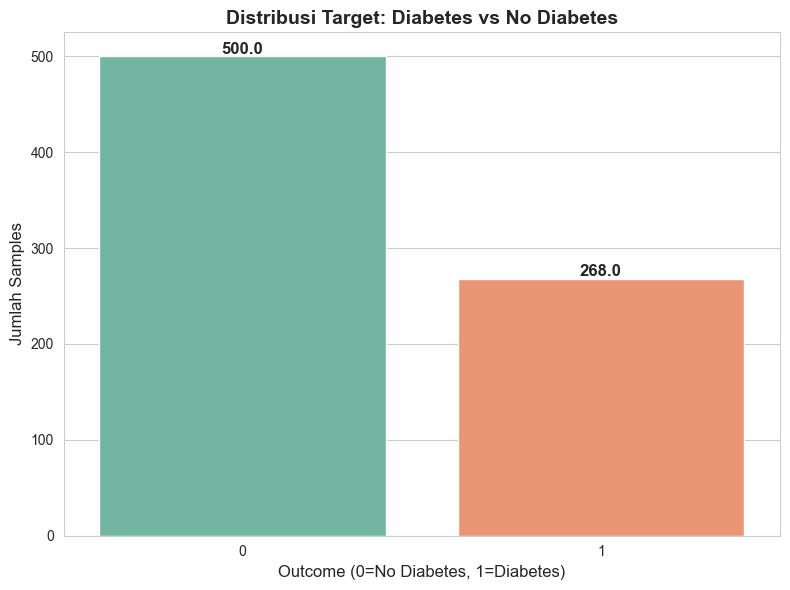

In [35]:
# Visualisasi distribusi target
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribusi Target: Diabetes vs No Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Outcome (0=No Diabetes, 1=Diabetes)', fontsize=12)
plt.ylabel('Jumlah Samples', fontsize=12)

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Distribusi Features

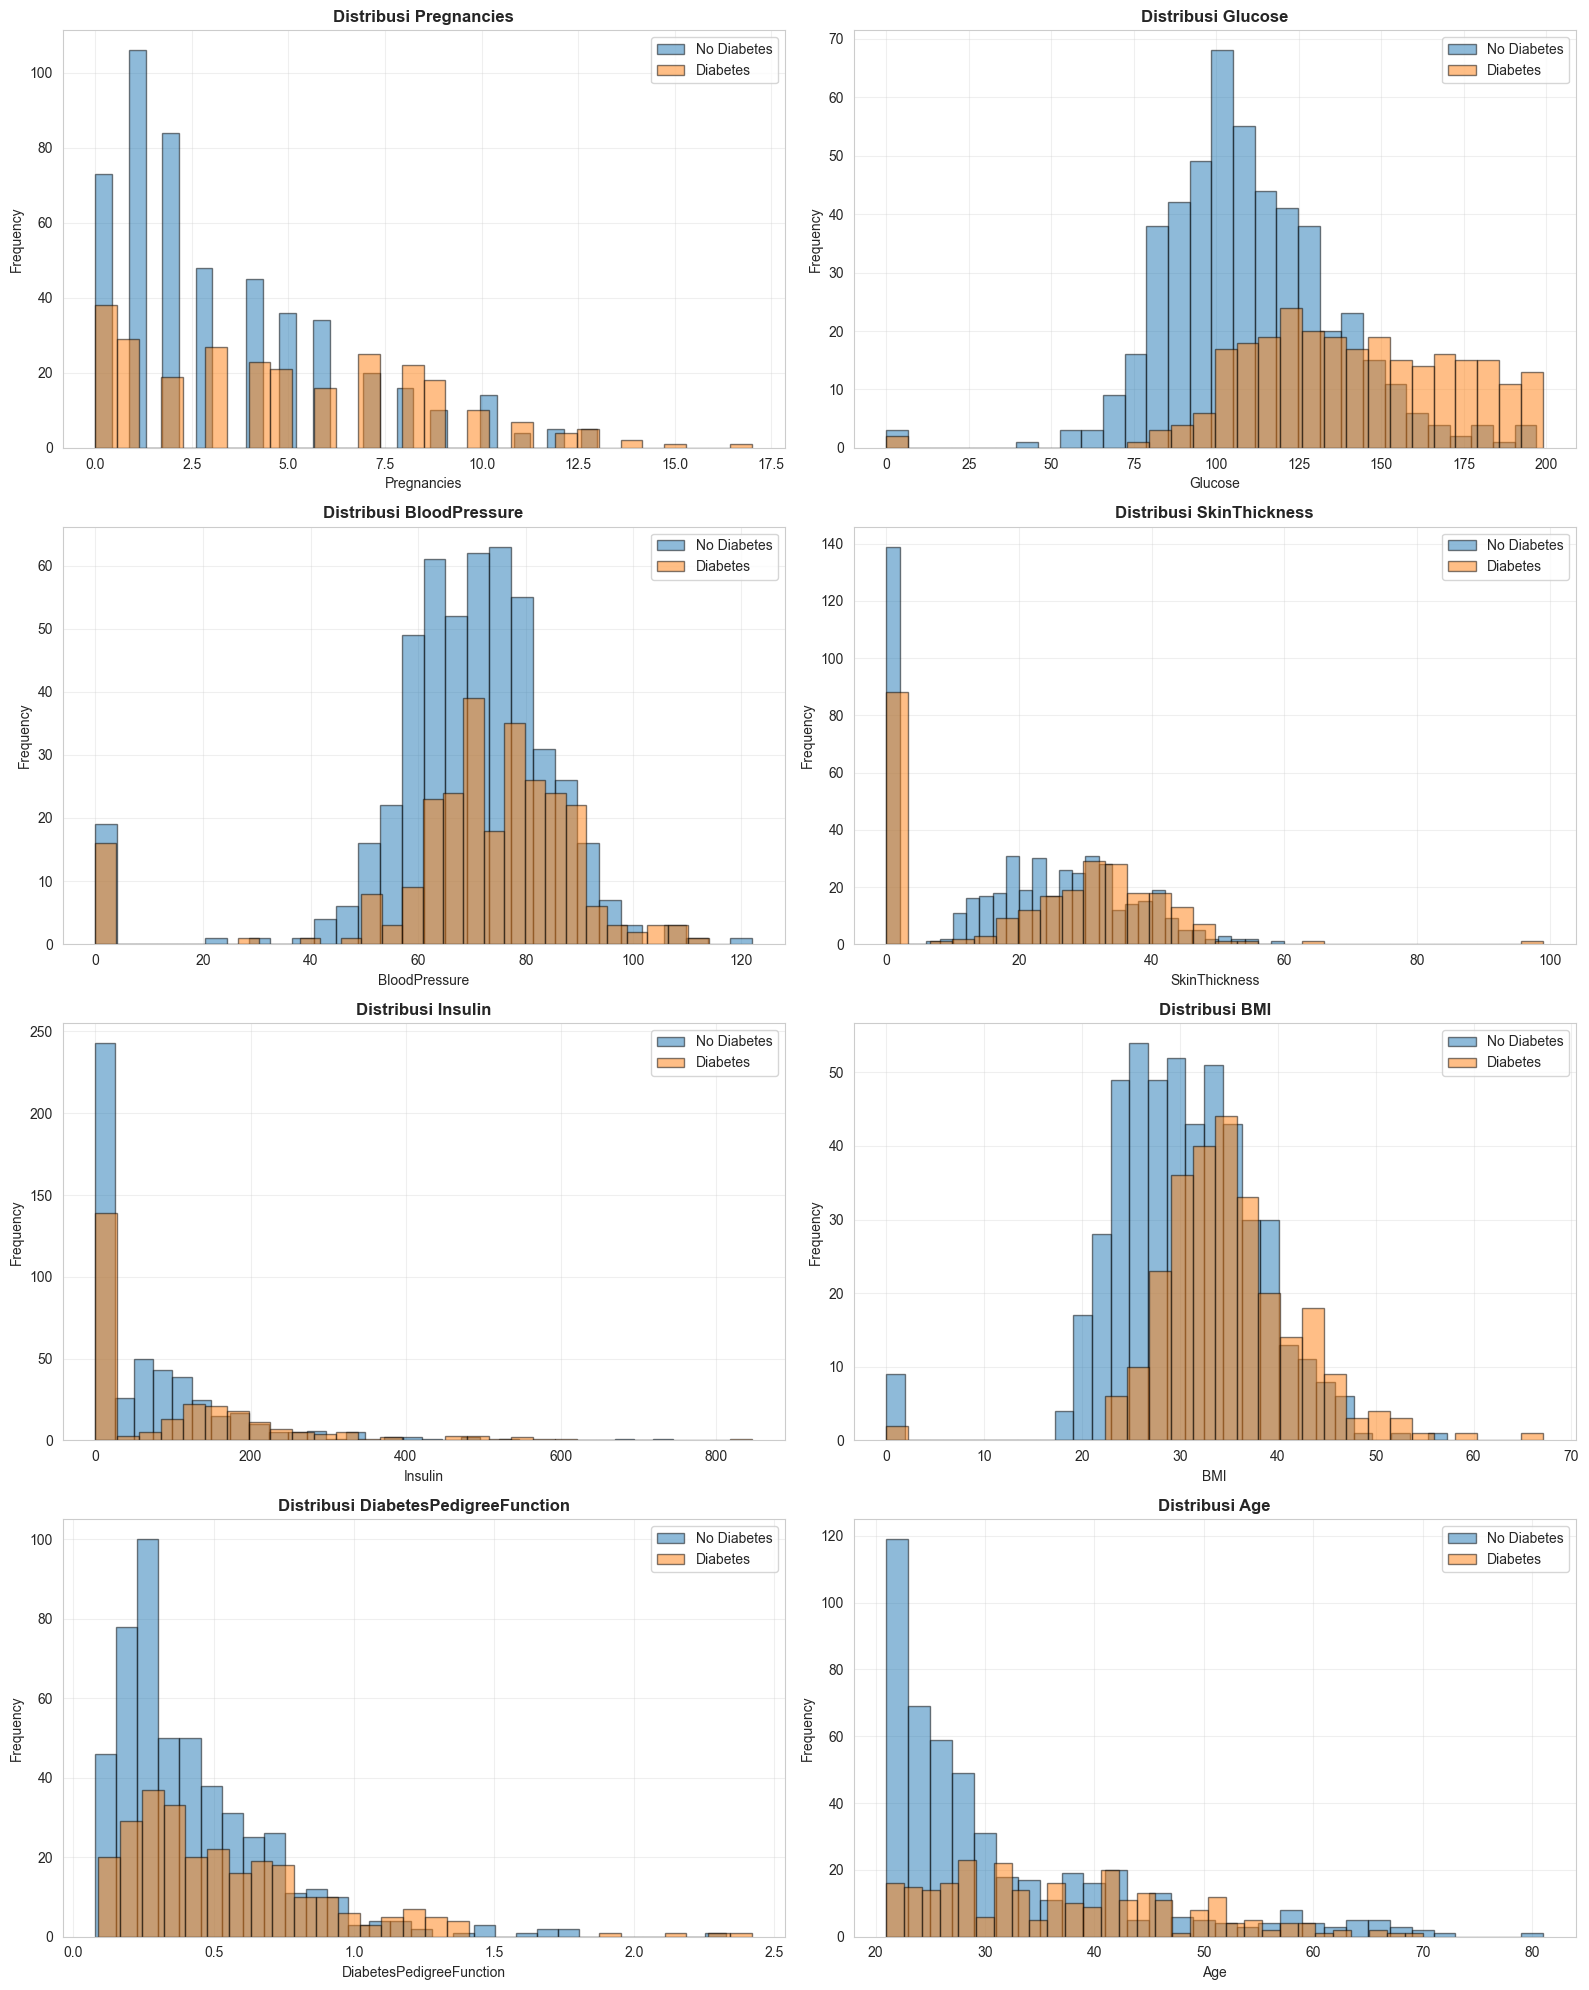

📊 Histogram semua features telah ditampilkan


In [36]:
# Histogram untuk semua features
features = df.columns[:-1]  # Exclude Outcome

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Plot histogram dengan hue berdasarkan Outcome
    for outcome in [0, 1]:
        data = df[df['Outcome'] == outcome][feature]
        label = 'No Diabetes' if outcome == 0 else 'Diabetes'
        ax.hist(data, bins=30, alpha=0.5, label=label, edgecolor='black')
    
    ax.set_title(f'Distribusi {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Histogram semua features telah ditampilkan")

## 6. Boxplot - Deteksi Outliers

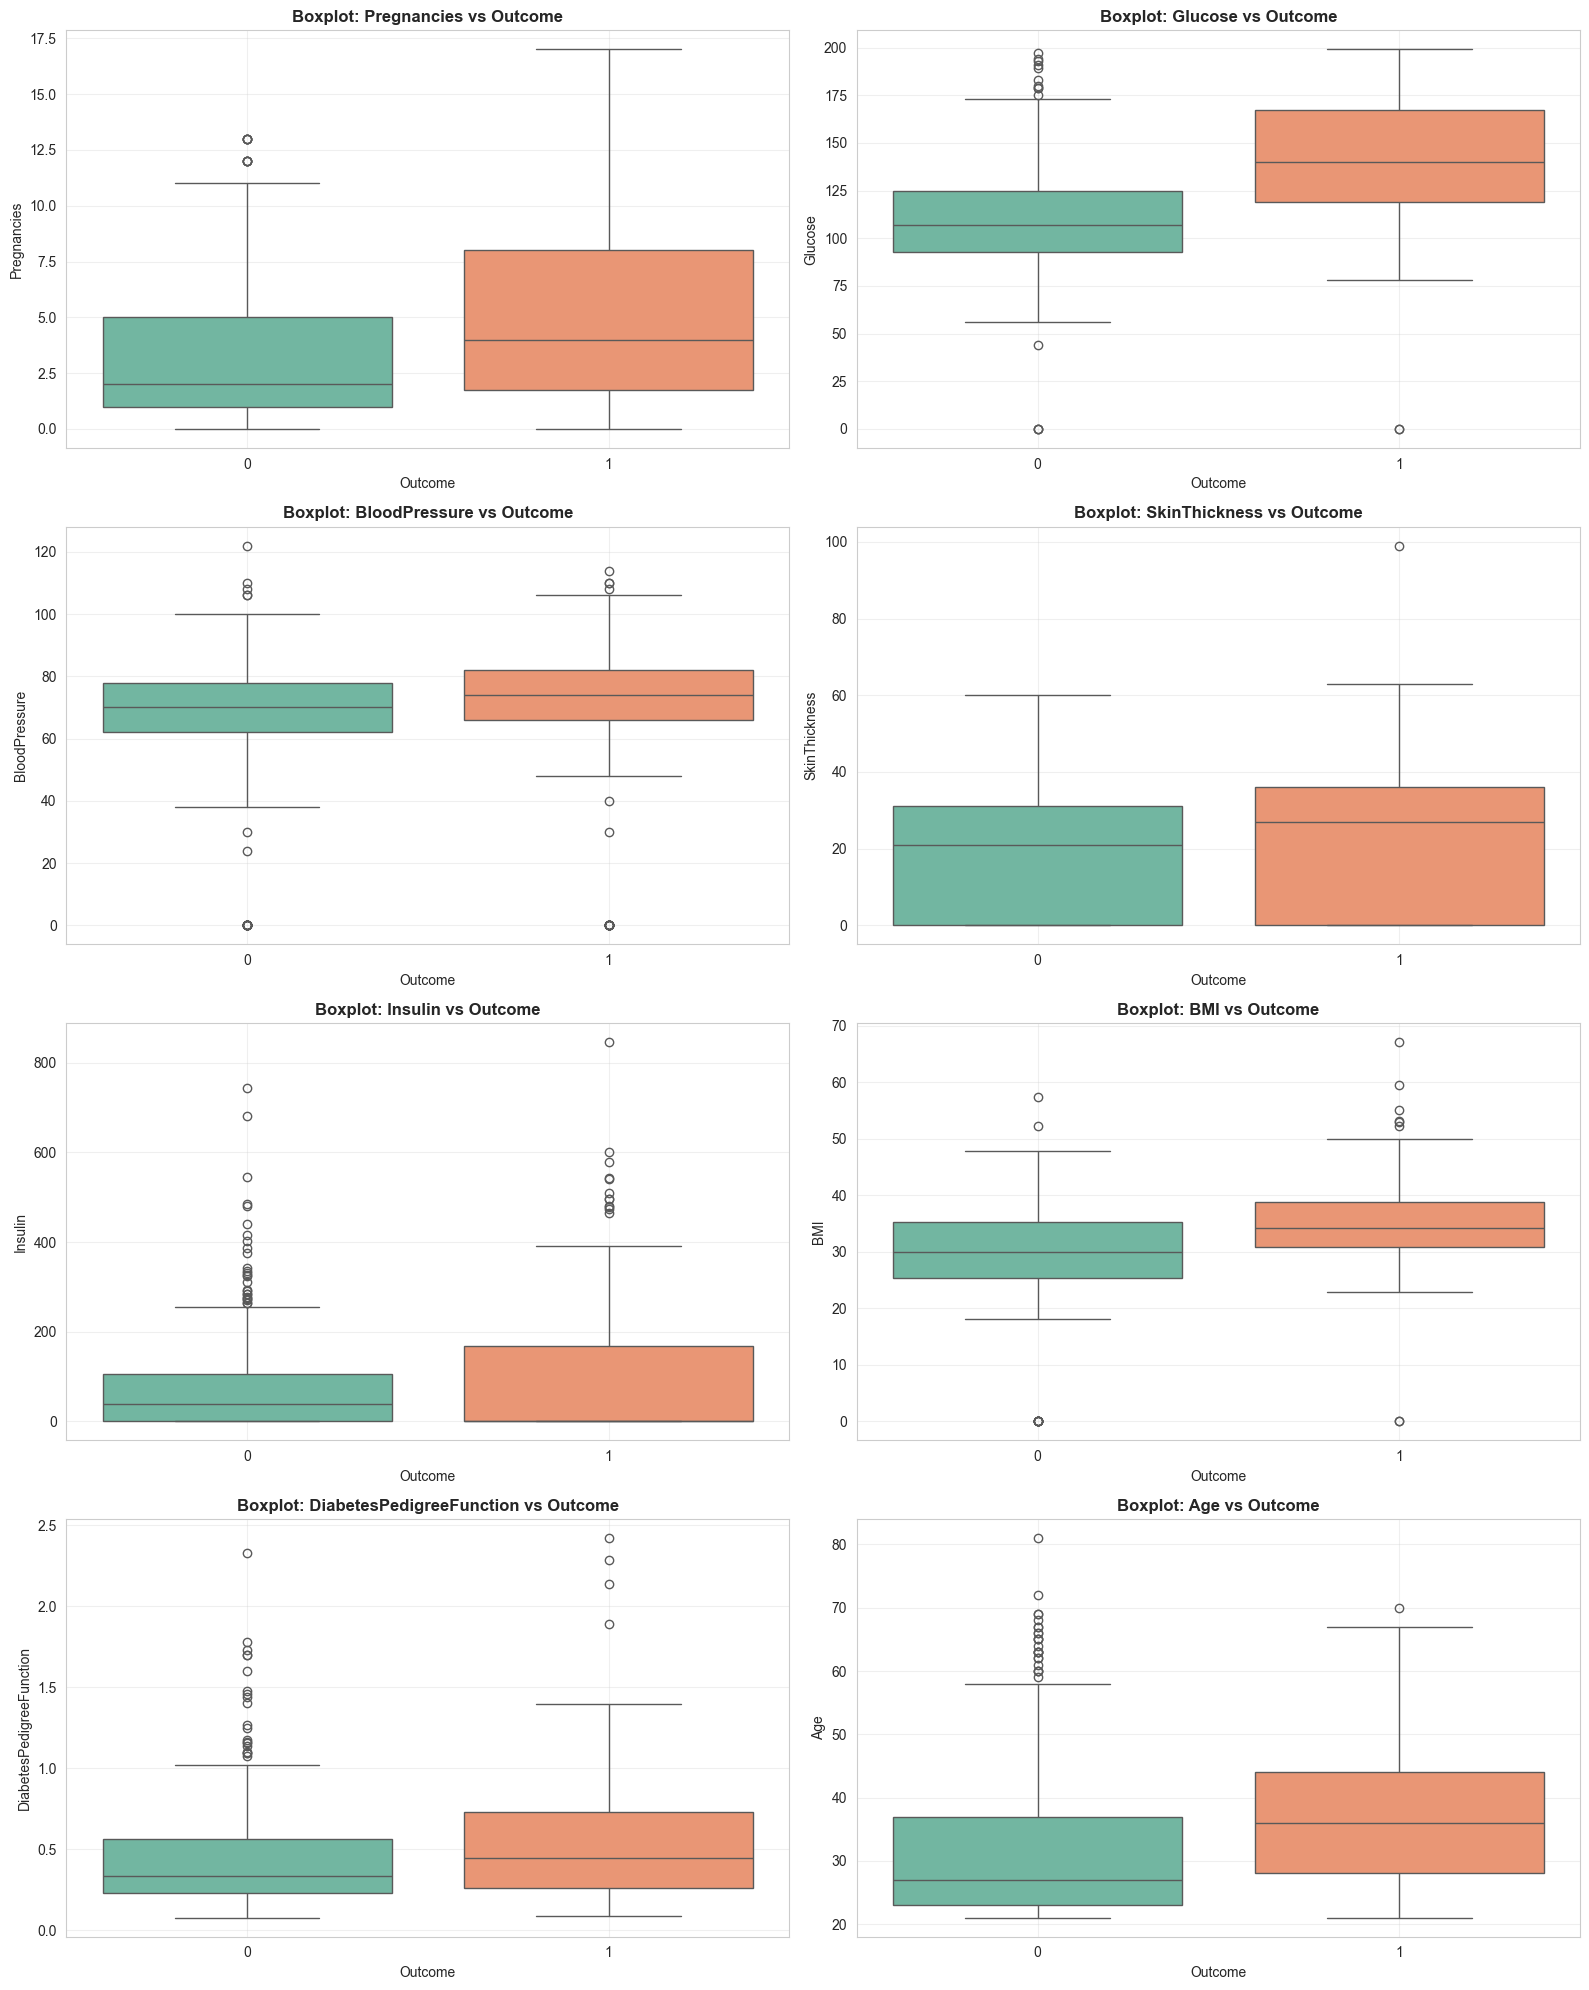

📦 Boxplot untuk deteksi outliers telah ditampilkan


In [37]:
# Boxplot untuk mendeteksi outliers
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x='Outcome', y=feature, data=df, ax=ax, palette='Set2')
    ax.set_title(f'Boxplot: {feature} vs Outcome', fontsize=12, fontweight='bold')
    ax.set_xlabel('Outcome', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📦 Boxplot untuk deteksi outliers telah ditampilkan")

## 7. Correlation Matrix

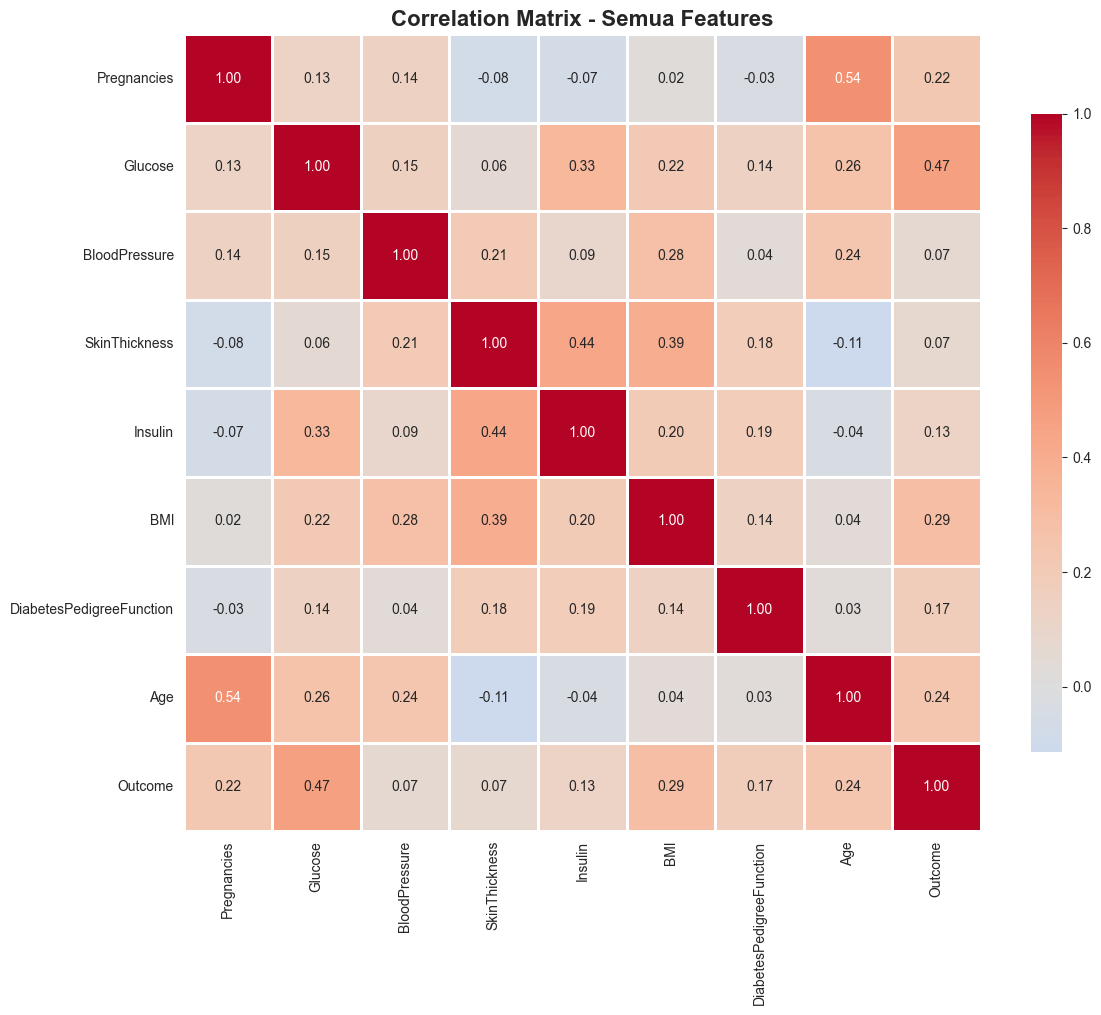

🔥 Correlation matrix telah ditampilkan


In [38]:
# Correlation matrix
correlation_matrix = df.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix - Semua Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔥 Correlation matrix telah ditampilkan")

In [39]:
# Korelasi dengan target (Outcome)
print("🎯 Korelasi Features dengan Target (Outcome):\n")
print("=" * 50)

target_corr = correlation_matrix['Outcome'].sort_values(ascending=False)

for feature, corr in target_corr.items():
    if feature != 'Outcome':
        bar = '█' * int(abs(corr) * 50)
        direction = '📈' if corr > 0 else '📉'
        print(f"{direction} {feature:<25} {corr:>7.3f}  {bar}")

print("=" * 50)

# Top correlated features
top_corr = target_corr[abs(target_corr) > 0.2].drop('Outcome')
print(f"\n⭐ Features dengan korelasi > 0.2 (dengan Outcome):")
for feature, corr in top_corr.items():
    print(f"   - {feature}: {corr:.3f}")

print("\n" + "="*70)
print("🔍 INTERPRETASI: Correlation Analysis")
print("="*70)

print("\n1️⃣  GLUCOSE (Korelasi: 0.467) ⭐⭐⭐⭐⭐")
print("   • Korelasi TERKUAT dengan Outcome")
print("   • Positif: Semakin tinggi glucose, semakin likely diabetes")
print("   • Medical fact: Glucose is PRIMARY indicator for diabetes")
print("   • 46.7% varian dalam Outcome bisa dijelaskan oleh Glucose")
print("   🔥 MOST IMPORTANT FEATURE!")

print("\n2️⃣  BMI (Korelasi: 0.293) ⭐⭐⭐⭐")
print("   • Korelasi kuat kedua")
print("   • Positif: Semakin tinggi BMI, semakin likely diabetes")
print("   • Medical fact: Obesity adalah risk factor utama diabetes")
print("   • Overweight/Obesity → Insulin resistance")

print("\n3️⃣  AGE (Korelasi: 0.238) ⭐⭐⭐")
print("   • Korelasi moderate")
print("   • Positif: Semakin tua, semakin likely diabetes")
print("   • Medical fact: Risk increases with age")
print("   • Pancreas function menurun seiring usia")

print("\n4️⃣  PREGNANCIES (Korelasi: 0.222) ⭐⭐⭐")
print("   • Korelasi moderate")
print("   • Positif: Lebih banyak kehamilan = higher risk")
print("   • Medical fact: Gestational diabetes risk")
print("   • Hormonal changes during pregnancy")

print("\n5️⃣  DIABETES PEDIGREE FUNCTION (Korelasi: 0.174) ⭐⭐")
print("   • Korelasi lemah-moderate")
print("   • Genetic risk factor")
print("   • Family history of diabetes")

print("\n6️⃣  INSULIN (Korelasi: 0.131) ⭐")
print("   • Korelasi lemah")
print("   ⚠️ TAPI: 48.7% data adalah missing (zeros)")
print("   • Mungkin korelasi sebenarnya lebih tinggi!")
print("   • Setelah imputation, mungkin akan berubah")

print("\n7️⃣  SKIN THICKNESS & BLOOD PRESSURE (Korelasi: < 0.1)")
print("   • Korelasi sangat lemah")
print("   • Mungkin tidak terlalu predictive")
print("   • Bisa dipertimbangkan untuk feature selection")

print("\n" + "="*70)
print("💡 KEY INSIGHTS:")
print("="*70)
print("\n✅ MULTICOLLINEARITY CHECK:")
print("   • Korelasi antar features (bukan dengan target):")
print("   • Age - Pregnancies: 0.54 (moderate)")
print("     → Wajar, lebih tua = lebih mungkin punya lebih banyak anak")
print("   • Glucose - Insulin: 0.33 (moderate)")
print("     → Wajar, berkaitan dengan metabolisme")
print("   • BMI - SkinThickness: 0.39 (moderate)")
print("     → Wajar, body composition related")
print("   ⚠️ Tidak ada severe multicollinearity (> 0.8)")
print("   ✅ Tidak perlu hapus features karena multicollinearity")

print("\n🎯 FEATURE IMPORTANCE RANKING:")
for i, (feature, corr) in enumerate(top_corr.items(), 1):
    importance = "🔥 CRITICAL" if corr > 0.4 else "⭐ IMPORTANT" if corr > 0.25 else "✓ RELEVANT"
    print(f"   {i}. {feature:<25} ({corr:.3f}) - {importance}")

print("\n📊 FEATURE SELECTION CONSIDERATION:")
print("   • Gunakan semua 8 features untuk baseline")
print("   • SkinThickness & BloodPressure bisa di-drop jika performa kurang")
print("   • Glucose WAJIB ada (highest correlation)")

print("\n🔬 MODEL IMPLICATIONS:")
print("   • Linear models akan benefit dari feature correlations")
print("   • Tree-based models bisa capture non-linear relationships")
print("   • Glucose akan memiliki highest feature importance")

print("="*70)

🎯 Korelasi Features dengan Target (Outcome):

📈 Glucose                     0.467  ███████████████████████
📈 BMI                         0.293  ██████████████
📈 Age                         0.238  ███████████
📈 Pregnancies                 0.222  ███████████
📈 DiabetesPedigreeFunction    0.174  ████████
📈 Insulin                     0.131  ██████
📈 SkinThickness               0.075  ███
📈 BloodPressure               0.065  ███

⭐ Features dengan korelasi > 0.2 (dengan Outcome):
   - Glucose: 0.467
   - BMI: 0.293
   - Age: 0.238
   - Pregnancies: 0.222

🔍 INTERPRETASI: Correlation Analysis

1️⃣  GLUCOSE (Korelasi: 0.467) ⭐⭐⭐⭐⭐
   • Korelasi TERKUAT dengan Outcome
   • Positif: Semakin tinggi glucose, semakin likely diabetes
   • Medical fact: Glucose is PRIMARY indicator for diabetes
   • 46.7% varian dalam Outcome bisa dijelaskan oleh Glucose
   🔥 MOST IMPORTANT FEATURE!

2️⃣  BMI (Korelasi: 0.293) ⭐⭐⭐⭐
   • Korelasi kuat kedua
   • Positif: Semakin tinggi BMI, semakin likely diabetes
 

## 8. Summary dan Rekomendasi Preprocessing

In [40]:
print("=" * 70)
print("📋 SUMMARY: REKOMENDASI PREPROCESSING")
print("=" * 70)

print("\n1️⃣  HANDLING NILAI NOL (Zeros):")
print("   ❌ Issue: Nilai 0 di kolom medis tidak valid secara klinis")
for col, count in zero_counts.items():
    print(f"      - {col}: {count} zeros ({count/len(df)*100:.1f}%)")
print("   ✅ Solution: Convert zeros → NaN → Median Imputation")
print("   🔧 Implement: Custom transformer untuk handling zeros")

print("\n2️⃣  CLASS IMBALANCE:")
print(f"   ❌ Issue: Ratio {outcome_counts[0]}/{outcome_counts[1]} = {outcome_counts[0]/outcome_counts[1]:.2f}:1 (65% vs 35%)")
print("   ✅ Solutions:")
print("      - Gunakan class weights dalam model")
print("      - Pertimbangkan SMOTE untuk oversampling")
print("      - Fokus pada Recall metric (minimize false negatives)")

print("\n3️⃣  FEATURE SCALING:")
print("   ✅ Use StandardScaler karena:")
print("      - Features memiliki range berbeda (Age: 21-81, Insulin: 0-846)")
print("      - Dibutuhkan untuk model linear/SVM")
print("      - Membantu convergence untuk gradient-based models")

print("\n4️⃣  FEATURE SELECTION (opsional):")
print("   ⭐ Top features berdasarkan korelasi:")
for i, (feature, corr) in enumerate(top_corr.items(), 1):
    print(f"      {i}. {feature}: {corr:.3f}")

print("\n5️⃣  OUTLIER TREATMENT:")
print("   ℹ️  Observasi: Ada outliers di beberapa features (Insulin, BMI)")
print("   ✅ Strategy: Median imputation lebih robust terhadap outliers")
print("   📊 Alternative: Pertimbangkan RobustScaler jika outlier extreme")

print("\n" + "=" * 70)
print("🎯 REKOMENDASI MODEL:")
print("=" * 70)
print("\n1. Baseline: Logistic Regression (dengan class_weights='balanced')")
print("2. Ensemble: Random Forest Classifier (handle non-linear relationships)")
print("3. Advanced: XGBoost/LightGBM (jika performance belum optimal)")

print("\n📈 METRICS PRIORITY:")
print("   1. RECALL - Most critical (minimize missed diabetes cases)")
print("   2. F1-SCORE - Balance precision and recall")
print("   3. ROC-AUC - Overall discriminative ability")
print("   4. ACCURACY - Secondary metric (due to class imbalance)")

print("\n" + "=" * 70)
print("✅ Analisis EDA selesai! Siap untuk implementasi preprocessing pipeline.")
print("=" * 70)

📋 SUMMARY: REKOMENDASI PREPROCESSING

1️⃣  HANDLING NILAI NOL (Zeros):
   ❌ Issue: Nilai 0 di kolom medis tidak valid secara klinis
      - Glucose: 5 zeros (0.7%)
      - BloodPressure: 35 zeros (4.6%)
      - SkinThickness: 227 zeros (29.6%)
      - Insulin: 374 zeros (48.7%)
      - BMI: 11 zeros (1.4%)
   ✅ Solution: Convert zeros → NaN → Median Imputation
   🔧 Implement: Custom transformer untuk handling zeros

2️⃣  CLASS IMBALANCE:
   ❌ Issue: Ratio 500/268 = 1.87:1 (65% vs 35%)
   ✅ Solutions:
      - Gunakan class weights dalam model
      - Pertimbangkan SMOTE untuk oversampling
      - Fokus pada Recall metric (minimize false negatives)

3️⃣  FEATURE SCALING:
   ✅ Use StandardScaler karena:
      - Features memiliki range berbeda (Age: 21-81, Insulin: 0-846)
      - Dibutuhkan untuk model linear/SVM
      - Membantu convergence untuk gradient-based models

4️⃣  FEATURE SELECTION (opsional):
   ⭐ Top features berdasarkan korelasi:
      1. Glucose: 0.467
      2. BMI: 0.293
  

In [41]:
# Final Summary - EDA Findings
print("="*70)
print("🎉 EDA COMPLETE - FINAL SUMMARY & RECOMMENDATIONS")
print("="*70)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total Samples: {len(df)}")
print(f"   • Total Features: {len(df.columns) - 1}")
print(f"   • Memory Usage: 54.1 KB (Lightweight)")
print(f"   • Data Quality: Good (dengan preprocessing)")

print("\n⚠️  TOP 3 DATA ISSUES:")
print("   1. Invalid Zeros: 652 values (48.7% Insulin alone!)")
print("   2. Class Imbalance: 1.87:1 ratio (65% vs 35%)")
print("   3. Feature Range: Highly variable (0-846)")

print("\n🔥 TOP 3 PREDICTIVE FEATURES:")
print("   1. Glucose: 0.467 correlation (PRIMARY indicator)")
print("   2. BMI: 0.293 correlation (Obesity risk)")
print("   3. Age: 0.238 correlation (Age-related risk)")

print("\n✅ PREPROCESSING CHECKLIST:")
print("   ☐ Build ZeroToNanTransformer for medical columns")
print("   ☐ Apply Median Imputation (robust to outliers)")
print("   ☐ Apply StandardScaler (normalize feature ranges)")
print("   ☐ Use class_weight='balanced' in models")

print("\n🎯 MODEL TRAINING PRIORITIES:")
print("   1. Start Simple: Logistic Regression baseline")
print("   2. Metric Focus: RECALL > 70% (minimize false negatives)")
print("   3. Experiment Tracking: MLflow for all runs")
print("   4. Reproducibility: random_state=42 everywhere")

print("\n📈 SUCCESS CRITERIA:")
print("   ✓ Recall ≥ 70% (catch most diabetes cases)")
print("   ✓ F1-Score ≥ 0.65 (balanced performance)")
print("   ✓ ROC-AUC ≥ 0.75 (good discrimination)")
print("   ✓ Model size < 5MB (deployable)")

print("\n🚀 READY FOR IMPLEMENTATION!")
print("="*70)
print("\n💾 Save key findings for reference...")
print("\nNext: Create src/processing.py with custom transformer")
print("="*70)

# Save key statistics to file
summary_dict = {
    'dataset_shape': df.shape,
    'total_samples': int(len(df)),
    'total_features': int(len(df.columns) - 1),
    'class_distribution': {
        'no_diabetes': int(outcome_counts[0]),
        'diabetes': int(outcome_counts[1])
    },
    'class_percentages': {
        'no_diabetes': float(outcome_percentages[0]),
        'diabetes': float(outcome_percentages[1])
    },
    'class_ratio': f"{outcome_counts[0]}/{outcome_counts[1]} = {float(outcome_counts[0]/outcome_counts[1]):.2f}:1",
    'invalid_zeros': {
        'Glucose': int(zero_counts['Glucose']),
        'BloodPressure': int(zero_counts['BloodPressure']),
        'SkinThickness': int(zero_counts['SkinThickness']),
        'Insulin': int(zero_counts['Insulin']),
        'BMI': int(zero_counts['BMI'])
    },
    'total_invalid_zeros': int(sum(zero_counts.values())),
    'top_correlated_features': {
        'Glucose': float(top_corr['Glucose']),
        'BMI': float(top_corr['BMI']),
        'Age': float(top_corr['Age']),
        'Pregnancies': float(top_corr['Pregnancies'])
    },
    'target_metrics': {
        'recall': 0.70,
        'f1_score': 0.65,
        'roc_auc': 0.75
    },
    'next_steps': [
        'Create ZeroToNanTransformer in src/processing.py',
        'Build preprocessing pipeline with imputation and scaling',
        'Implement training script with MLflow tracking',
        'Build Streamlit app for predictions'
    ]
}

import json
with open('../eda_key_findings.json', 'w') as f:
    json.dump(summary_dict, f, indent=2)

print("\n✅ Key findings saved to: eda_key_findings.json")

🎉 EDA COMPLETE - FINAL SUMMARY & RECOMMENDATIONS

📊 DATASET OVERVIEW:
   • Total Samples: 768
   • Total Features: 8
   • Memory Usage: 54.1 KB (Lightweight)
   • Data Quality: Good (dengan preprocessing)

⚠️  TOP 3 DATA ISSUES:
   1. Invalid Zeros: 652 values (48.7% Insulin alone!)
   2. Class Imbalance: 1.87:1 ratio (65% vs 35%)
   3. Feature Range: Highly variable (0-846)

🔥 TOP 3 PREDICTIVE FEATURES:
   1. Glucose: 0.467 correlation (PRIMARY indicator)
   2. BMI: 0.293 correlation (Obesity risk)
   3. Age: 0.238 correlation (Age-related risk)

✅ PREPROCESSING CHECKLIST:
   ☐ Build ZeroToNanTransformer for medical columns
   ☐ Apply Median Imputation (robust to outliers)
   ☐ Apply StandardScaler (normalize feature ranges)
   ☐ Use class_weight='balanced' in models

🎯 MODEL TRAINING PRIORITIES:
   1. Start Simple: Logistic Regression baseline
   2. Metric Focus: RECALL > 70% (minimize false negatives)
   3. Experiment Tracking: MLflow for all runs
   4. Reproducibility: random_state

---
## 9. Action Plan: Dari EDA ke Implementation

### ✅ Apa yang Kita Pelajari dari EDA?

| Aspect | Key Finding | Action Required |
|--------|-------------|-----------------|
| **Missing Values** | 652 invalid zeros di medical columns | Custom transformer: 0 → NaN → Median imputation |
| **Class Balance** | 65.1% vs 34.9% (1.87:1 ratio) | Use class weights='balanced', focus on Recall |
| **Feature Scaling** | Range sangat bervariasi (0-846) | StandardScaler wajib digunakan |
| **Feature Importance** | Glucose (#1), BMI (#2), Age (#3) | Prioritize features, consider dropping weak ones |
| **Outliers** | Extreme values di Insulin, BMI | Median imputation lebih robust |
| **Correlations** | No severe multicollinearity | All features can be used |

### 🎯 Next Steps (Prioritas):

1. **Implement `src/processing.py`**
   - Buat `ZeroToNanTransformer` class
   - Create pipeline: Custom transformer → SimpleImputer(median) → StandardScaler
   
2. **Implement `src/training.py`**
   - Logistic Regression dengan class weights
   - MLflow tracking untuk semua experiments
   - Evaluate: Accuracy, Recall, F1-Score, ROC-AUC

3. **Build `app.py`**
   - Streamlit UI untuk prediction
   - Load saved pipeline & model
   - Show prediction dengan probability

### 📊 Target Metrics (Berdasarkan EDA):

```
Baseline Goals:
├── Recall: > 70% (most critical for medical diagnosis)
├── F1-Score: > 0.65 (balance precision & recall)
├── ROC-AUC: > 0.75 (good discrimination)
└── Accuracy: > 75% (reasonable baseline)
```

### ⚠️ Critical Reminders:

- ✅ **JANGAN lupa** save preprocessing pipeline bersama model
- ✅ **SELALU gunakan** random_state untuk reproducibility
- ✅ **WAJIB log** semua parameters ke MLflow
- ✅ **FOCUS pada** Recall, bukan Accuracy
